<a href="https://colab.research.google.com/github/ravi-gopalan/quadcopter/blob/master/quadcopter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Train a Quadcopter How to Fly

In [1]:
pwd

'/content'

In [0]:
!mkdir quadcopter

In [4]:
!cp -v /agent.py /content/quadcopter
!cp -v /physics_sim.py /content/quadcopter
!cp -v /policy_search.py /content/quadcopter
!cp -v /takeoff.py /content/quadcopter
!cp -v /task.py /content/quadcopter


'/physics_sim.py' -> '/content/quadcopter/physics_sim.py'
'/policy_search.py' -> '/content/quadcopter/policy_search.py'
'/takeoff.py' -> '/content/quadcopter/takeoff.py'
'/task.py' -> '/content/quadcopter/task.py'


## Import libraries

In [0]:

import sys
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D





## Controlling the Quadcopter
This is a sample agent in the code cell below to show you how to use the sim to control the quadcopter. 


The agent controls the quadcopter by setting the revolutions per second on each of its four rotors. The provided agent in the Basic_Agent class below always selects a random action for each of the four rotors. These four speeds are returned by the act method as a list of four floating-point numbers.

In [0]:
class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

In [8]:
cd /content/quadcopter

/content/quadcopter


Run the code cell below to have the agent select actions to control the quadcopter.

Feel free to change the provided values of runtime, init_pose, init_velocities, and init_angle_velocities below to change the starting conditions of the quadcopter.

The labels list below annotates statistics that are saved while running the simulation. All of this information is saved in a text file data.txt and stored in the dictionary results.

In [9]:
%load_ext autoreload
%autoreload 2

from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 500.                                     # time limit of the episode
init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Setting default init pose


Run the code cell below to visualize the following:
- he position of the quadcopter evolved during the simulation, 

*   Position of the quadcopter
*   Velocity of the quadcopter
*   Euler angles (rotation over the *x-*, *y-* and *z-* axes)
*   Velocities in (radians per sec) corresponding to each of the Euler angles


Finally, you can use the code cell below to print the agent's choice of actions i.e. rotor speeds.

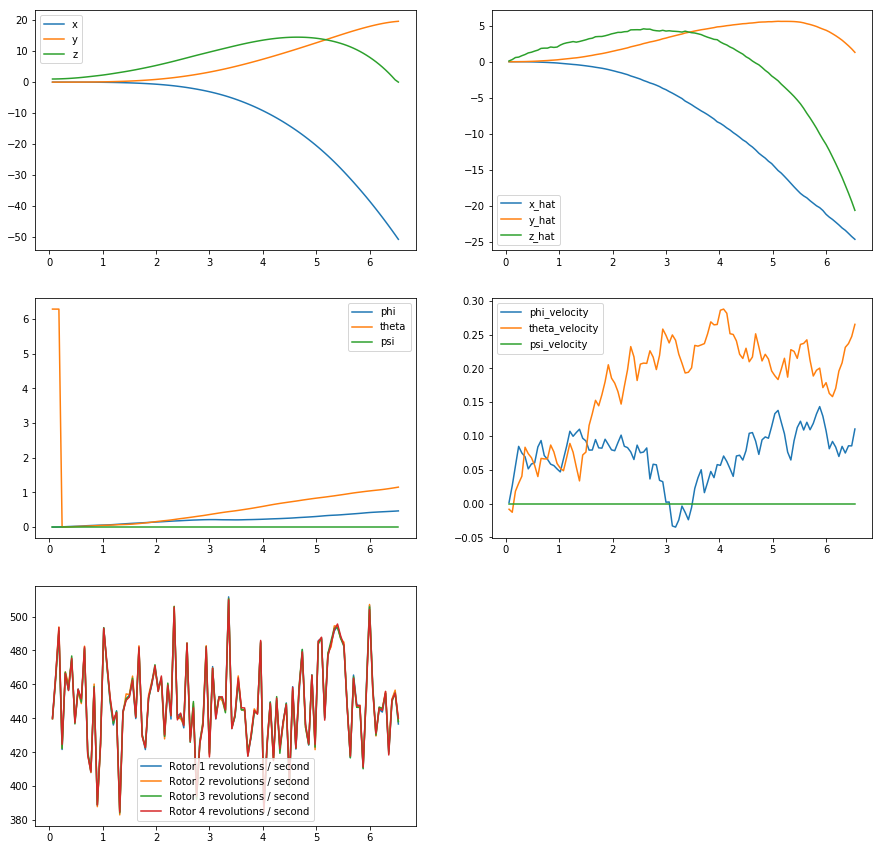

In [10]:
%matplotlib inline

fig_1 = plt.figure(figsize=(15,15))
gs_1 = gridspec.GridSpec(3, 2)

ax1 = plt.subplot(gs_1[0, 0])
ax1 = plt.plot(results['time'], results['x'], label='x')
ax1 = plt.plot(results['time'], results['y'], label='y')
ax1 = plt.plot(results['time'], results['z'], label='z')
plt.legend()



ax2 = plt.subplot(gs_1[0, 1])
ax2 = plt.plot(results['time'], results['x_velocity'], label='x_hat')
ax2 = plt.plot(results['time'], results['y_velocity'], label='y_hat')
ax2 = plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()

ax3 = plt.subplot(gs_1[1, 0])
ax3 = plt.plot(results['time'], results['phi'], label='phi')
ax3 = plt.plot(results['time'], results['theta'], label='theta')
ax3 = plt.plot(results['time'], results['psi'], label='psi')
plt.legend()


ax4 = plt.subplot(gs_1[1, 1])
ax4 = plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
ax4 = plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
ax4 = plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()

ax5 = plt.subplot(gs_1[2, 0])
ax5 = plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
ax5 = plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
ax5 = plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
ax5 = plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')


plt.legend()
_ = plt.ylim()

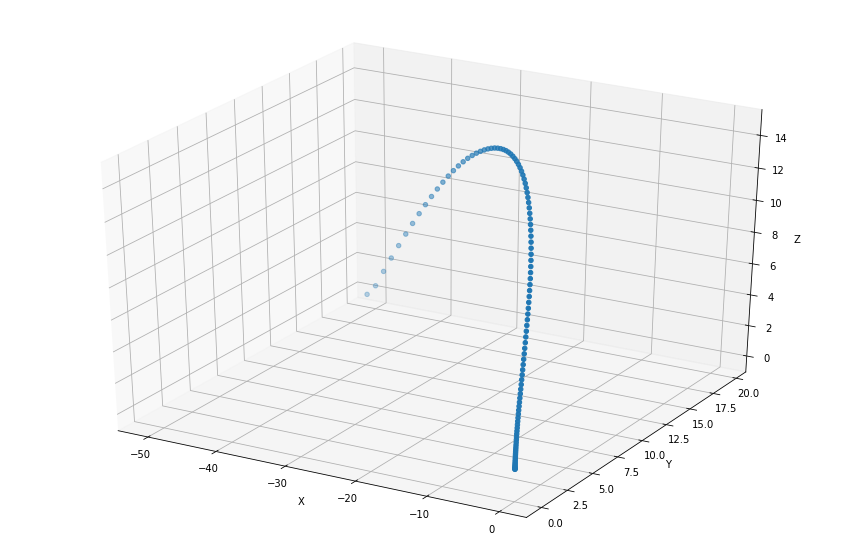

In [11]:
%matplotlib inline


fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(results['x'], results['y'], results['z'])

In [12]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-50.72528715  19.62558802   0.           0.46676943   1.15183863
   0.        ]
[-24.67976734   1.30138758 -20.65428709]
[0.11033792 0.26522211 0.        ]


In [13]:
from policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 200.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task)
#agent = PolicySearch_Agent(task)

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)


        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =  -9.018 (best =   2.273), noise_scale = 3.2

In [14]:
from agent import DDPG
from takeoff import Task

num_episodes = 500
target_pos = np.array([10., 10., 300.])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task)

worst_score = 100000
best_score = -100000
reward_log = 'reward.txt'

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)

        state = next_state
        score += reward
        best_score = max(best_score, score)
        worst_score = min(worst_score, score)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), (worst = {:7.3f})".format(
                i_episode, score, best_score, worst_score), end="")  # [debug]
            break
    reward_results['episode'].append(i_episode)
    reward_results['reward'].append(score)
    sys.stdout.flush()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Episode =  500, score = -2200.000 (best = 649.120), (worst = -2500.000)

Mean reward: -2200.0


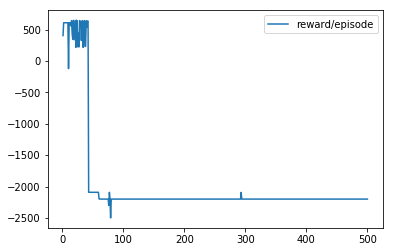

In [15]:
%matplotlib inline

plt.plot(reward_results['episode'], reward_results['reward'], label='reward/episode')
plt.legend()
_ = plt.ylim()

print('Mean reward: {}'.format(np.array(reward_results['reward'][-10:]).mean()))

In [16]:
%load_ext autoreload
%autoreload 2


from takeoff import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10000.                                     # time limit of the episode
init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Setting default init pose
Total episode reward : -849.9704437526548


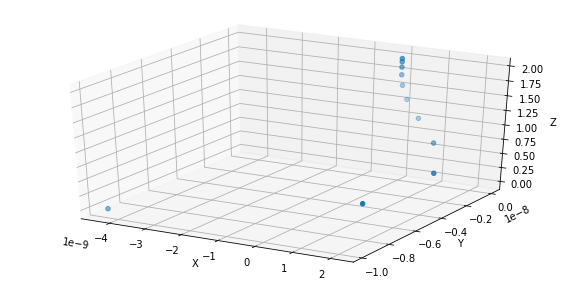

In [17]:
%matplotlib inline



fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(results['x'], results['y'], results['z'])

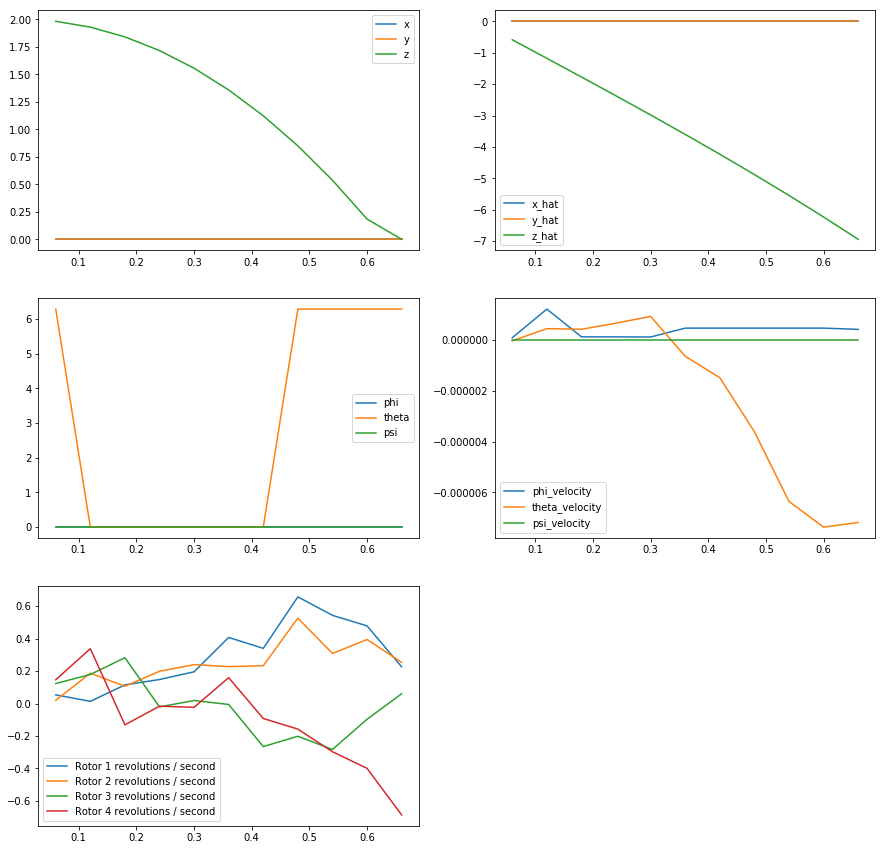

In [18]:
%matplotlib inline

fig_2 = plt.figure(figsize=(15,15))
gs_2 = gridspec.GridSpec(3, 2)

ax1_2 = plt.subplot(gs_2[0, 0])
ax1_2 = plt.plot(results['time'], results['x'], label='x')
ax1_2 = plt.plot(results['time'], results['y'], label='y')
ax1_2 = plt.plot(results['time'], results['z'], label='z')
plt.legend()



ax2_2 = plt.subplot(gs_2[0, 1])
ax2_2 = plt.plot(results['time'], results['x_velocity'], label='x_hat')
ax2_2 = plt.plot(results['time'], results['y_velocity'], label='y_hat')
ax2_2 = plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()

ax3_2 = plt.subplot(gs_2[1, 0])
ax3_2 = plt.plot(results['time'], results['phi'], label='phi')
ax3_2 = plt.plot(results['time'], results['theta'], label='theta')
ax3_2 = plt.plot(results['time'], results['psi'], label='psi')
plt.legend()


ax4_2 = plt.subplot(gs_2[1, 1])
ax4_2 = plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
ax4_2 = plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
ax4_2 = plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()

ax5_2 = plt.subplot(gs_2[2, 0])
ax5_2 = plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
ax5_2 = plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
ax5_2 = plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
ax5_2 = plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')


plt.legend()
_ = plt.ylim()